In [1]:
# load packages

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

D:\Anaconda\Anaconda3\envs\py35\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# change working directory

import os
os.chdir('F:/Columbia_MSAA/Courses/APANPS5500 Data Visualization/Assignment')

In [3]:
# load dataset

df_full = pd.read_csv('economy.csv')
df_full.head()

,Year,Population,CPI,Retail,GNP,Production,Trade,Capital,Equipment,Economy,DJI,IBM,BondLong,Unemployment,Prime,BondShort,Funds,Automobile,Housing,Capacity
0,67.00,197.892,0.329,24.165,2241.8000,57.6,67.8,8.088,138.3,73.3,830.56,37.9262,4.40,3.9,5.96,4.72,4.94,8.469,1.067,88.7
1,67.25,198.363,0.331,24.221,2255.2000,57.2,71.2,8.342,139.8,72.9,868.66,44.9585,4.51,3.8,5.50,3.84,4.05,8.916,1.091,86.8
2,67.50,198.911,0.334,24.662,2287.7000,56.5,71.3,8.822,138.0,75.4,888.51,50.1298,4.86,3.8,5.50,4.20,3.79,8.760,1.364,84.8
3,67.75,199.498,0.337,24.976,2300.6001,58.0,72.2,9.201,142.5,76.9,907.54,57.8531,5.18,4.0,5.50,4.55,3.88,7.866,1.491,85.8
4,68.00,199.920,0.341,25.818,2327.3000,59.4,77.3,5.909,146.6,78.0,884.77,61.1022,5.18,3.7,6.00,4.99,4.60,9.482,1.380,86.8


In [4]:
# dimension

print("The full dataset has {} rows and {} columns".format(df_full.shape[0],df_full.shape[1]))
df_full.shape

The full dataset has 98 rows and 20 columns


(98, 20)

In [5]:
# Calculate Skewness and Kurtosis

srs_skew = sp.stats.skew(df_full.drop(['Year'], axis=1))
srs_kurt = sp.stats.kurtosis(df_full.drop(['Year'], axis=1))

In [6]:
names = list(df_full)
names = names[1:]

In [7]:
# Descriptive analysis

df_desc = pd.DataFrame([srs_skew, srs_kurt])
df_desc.columns = names
df_desc = df_desc.rename(index={0:'Skewness', 1:'Kurtosis'})
df_desc

,Population,CPI,Retail,GNP,Production,Trade,Capital,Equipment,Economy,DJI,IBM,BondLong,Unemployment,Prime,BondShort,Funds,Automobile,Housing,Capacity
Skewness,0.013192,0.204162,0.379784,0.307290,0.216956,0.491277,0.338534,0.566247,0.461162,1.451860,0.731761,0.609832,0.317134,1.250051,1.155727,1.237263,-0.247634,0.279704,-0.43184
Kurtosis,-1.204988,-1.426030,-1.173653,-1.065655,-1.064426,-1.164178,-0.982251,-0.780301,-1.041767,0.706967,-0.637301,-0.434519,-0.184788,1.522178,1.061779,1.682806,-0.642823,-0.190193,-0.41860


In [8]:
# Calculate the growth rate of time series -- take the quarterly percentage change 

df_diff = df_full.drop(['Year'], axis=1).pct_change(periods=1)
df_diff['Year'] = df_full['Year']
df_diff.head()

,Population,CPI,Retail,GNP,Production,Trade,Capital,Equipment,Economy,DJI,IBM,BondLong,Unemployment,Prime,BondShort,Funds,Automobile,Housing,Capacity,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.00
1,0.002380,0.006079,0.002317,0.005977,-0.006944,0.050147,0.031405,0.010846,-0.005457,0.045873,0.185421,0.025000,-0.025641,-0.077181,-0.186441,-0.180162,0.052781,0.022493,-0.021421,67.25
2,0.002763,0.009063,0.018207,0.014411,-0.012238,0.001404,0.057540,-0.012876,0.034294,0.022851,0.115024,0.077605,0.000000,0.000000,0.093750,-0.064198,-0.017497,0.250229,-0.023041,67.50
3,0.002951,0.008982,0.012732,0.005639,0.026549,0.012623,0.042961,0.032609,0.019894,0.021418,0.154066,0.065844,0.052632,0.000000,0.083333,0.023747,-0.102055,0.093109,0.011792,67.75
4,0.002115,0.011869,0.033712,0.011606,0.024138,0.070637,-0.357787,0.028772,0.014304,-0.025090,0.056161,0.000000,-0.075000,0.090909,0.096703,0.185567,0.205441,-0.074447,0.011655,68.00


In [9]:
# Calculate Skewness and Kurtosis of the new dataframe

srs_diff_skew = sp.stats.skew(df_diff.drop(['Year'], axis=1).dropna(axis=0))
srs_diff_kurt = sp.stats.kurtosis(df_diff.drop(['Year'], axis=1).dropna(axis=0))

In [10]:
# Descriptive analysis of the new dataframe

df_diff_desc = pd.DataFrame([srs_diff_skew, srs_diff_kurt])
df_diff_desc.columns = names
df_diff_desc = df_diff_desc.rename(index={0:'Skewness', 1:'Kurtosis'})
df_diff_desc

,Population,CPI,Retail,GNP,Production,Trade,Capital,Equipment,Economy,DJI,IBM,BondLong,Unemployment,Prime,BondShort,Funds,Automobile,Housing,Capacity
Skewness,0.365485,0.586111,-0.043954,-0.290589,-1.494633,-0.316922,-0.666284,-0.249134,-0.569921,0.024748,0.081287,-0.775244,1.776716,0.197796,0.153786,0.117901,0.375923,0.258517,-1.467016
Kurtosis,-0.534713,0.621625,1.160124,0.416478,5.131586,0.808792,2.138782,0.678574,1.193785,0.352857,-0.504069,1.260474,6.830369,2.482846,1.234753,1.009624,1.001368,-0.429039,4.929892


In [11]:
tick_x = np.arange(len(names))

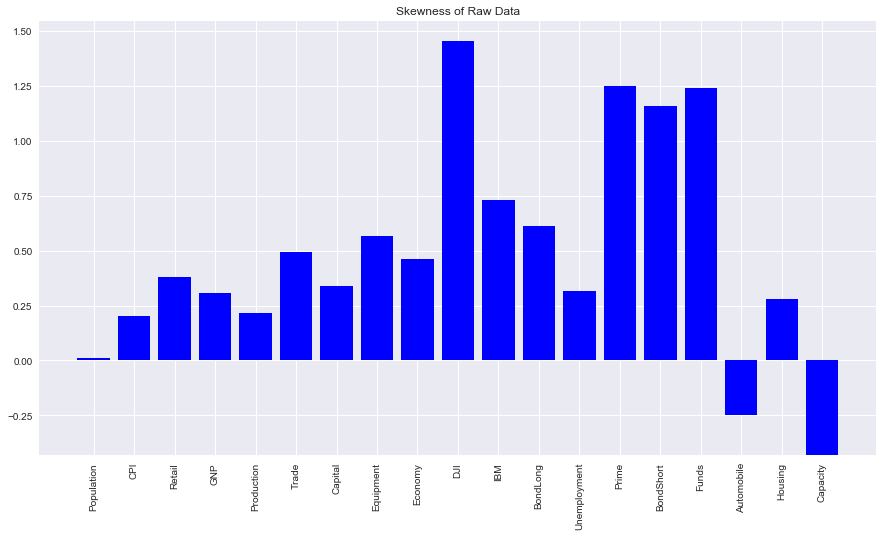

In [12]:
# Plot the bar chart of Skewness for original dataframe

plt.figure(figsize=(15,8))
plt.bar(tick_x, df_desc.loc['Skewness',:], align='center', color='blue')
plt.xticks(tick_x, names, rotation='vertical')
plt.title('Skewness of Raw Data')

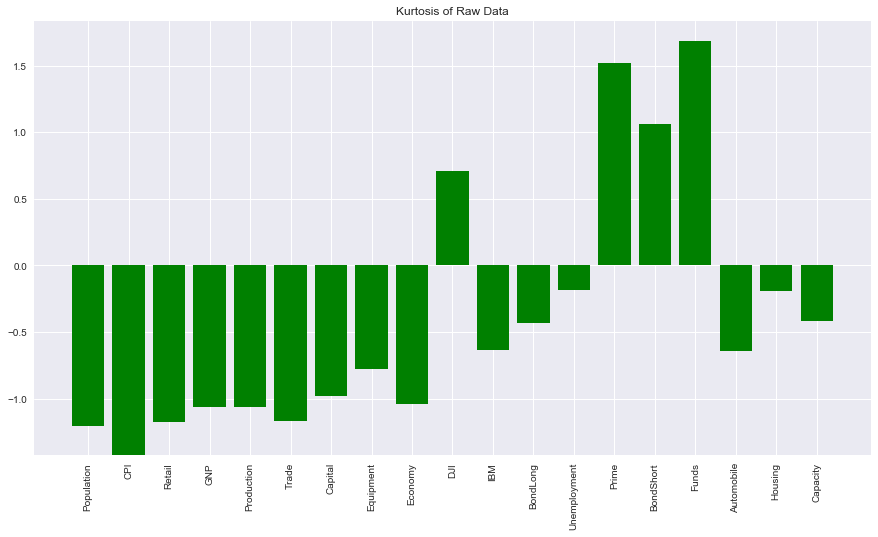

In [13]:
# Plot the bar chart of Kurtosis for original dataframe

plt.figure(figsize=(15,8))
plt.bar(tick_x, df_desc.loc['Kurtosis',:], align='center', color='green')
plt.xticks(tick_x, names, rotation='vertical')
plt.title('Kurtosis of Raw Data')

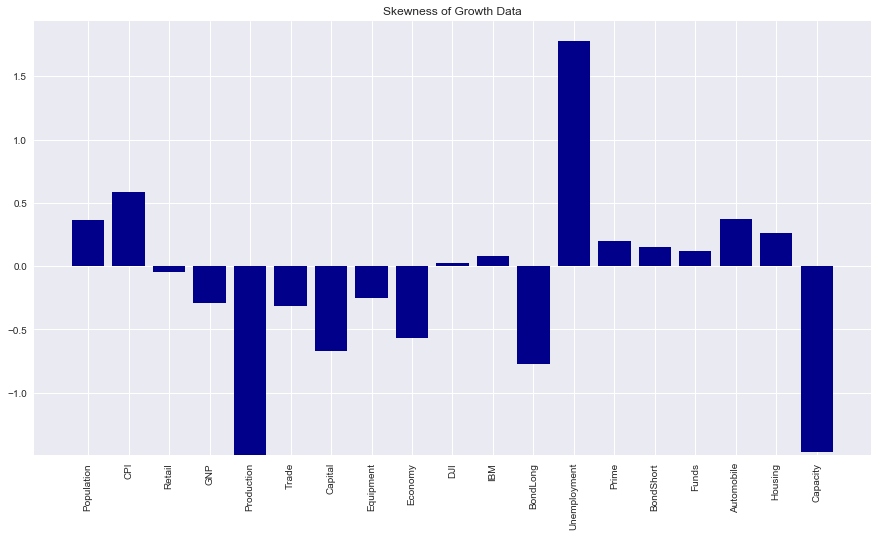

In [14]:
# Plot the bar chart of Skewness for new dataframe

plt.figure(figsize=(15,8))
plt.bar(tick_x, df_diff_desc.loc['Skewness',:], align='center', color='darkblue')
plt.xticks(tick_x, names, rotation='vertical')
plt.title('Skewness of Growth Data')

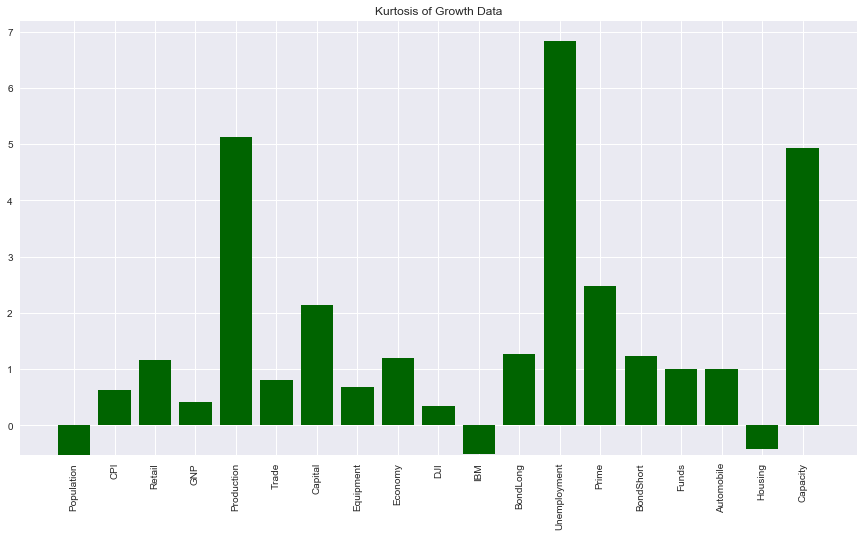

In [15]:
# Plot the bar chart of Kurtosis for new dataframe

plt.figure(figsize=(15,8))
plt.bar(tick_x, df_diff_desc.loc['Kurtosis',:], align='center', color='darkgreen')
plt.xticks(tick_x, names, rotation='vertical')
plt.title('Kurtosis of Growth Data')

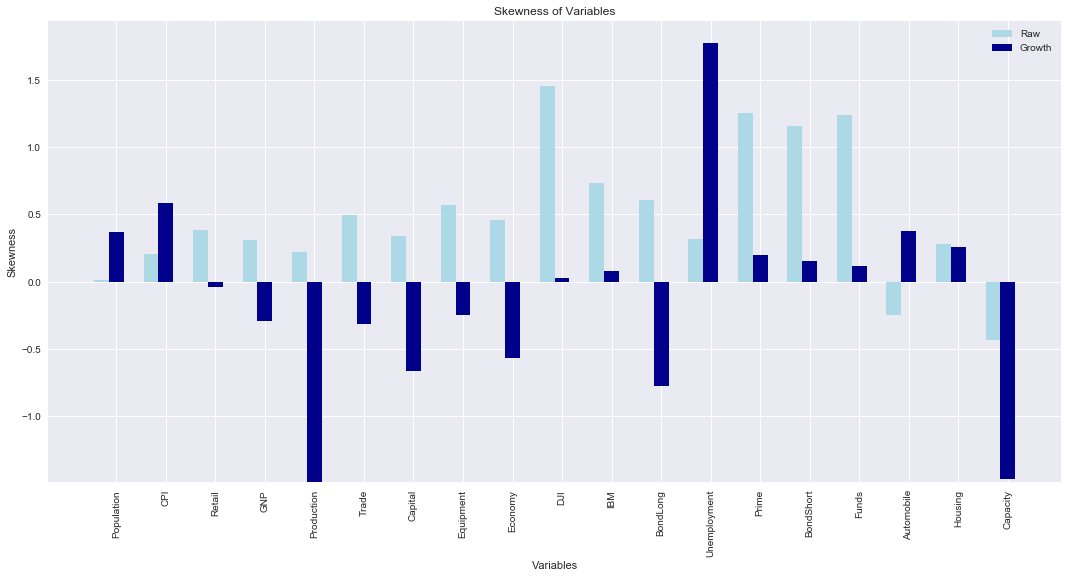

In [16]:
# Plot the bar chart of Skewness

plt.figure(figsize=(15,8))
bar_width = 0.3

plt.bar(tick_x, df_desc.loc['Skewness',:], width=bar_width, color='lightblue', label="Raw")
plt.bar(tick_x+bar_width, df_diff_desc.loc['Skewness',:], width=bar_width, color='darkblue', label="Growth")

plt.xlabel("Variables")
plt.ylabel("Skewness")
plt.xticks(tick_x+bar_width, names, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.title('Skewness of Variables')

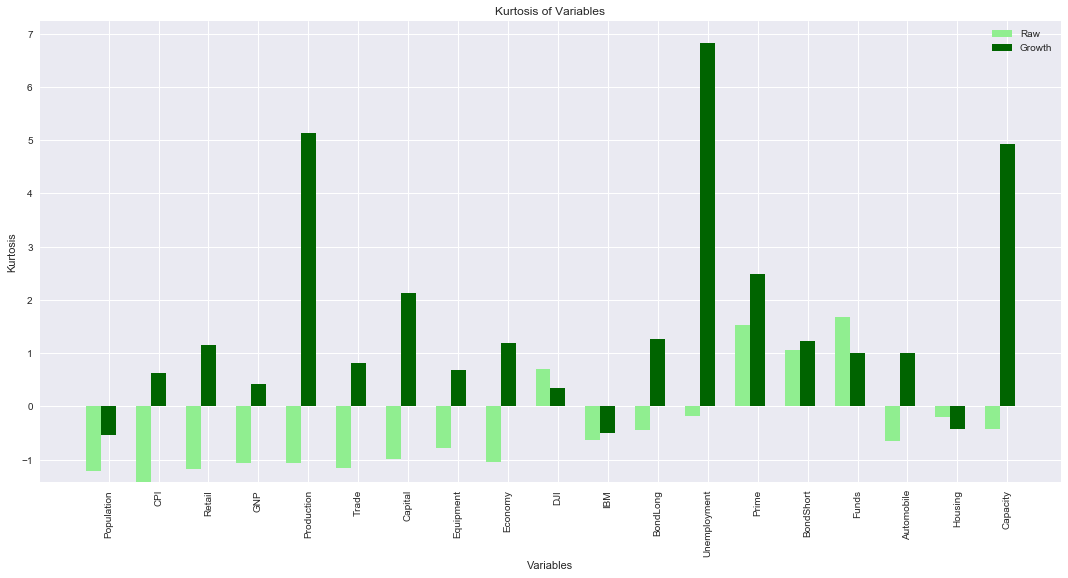

In [17]:
# Plot the bar chart of Kurtosis

plt.figure(figsize=(15,8))
bar_width = 0.3

plt.bar(tick_x, df_desc.loc['Kurtosis',:], width=bar_width, color='lightgreen', label="Raw")
plt.bar(tick_x+bar_width, df_diff_desc.loc['Kurtosis',:], width=bar_width, color='darkgreen', label="Growth")

plt.xlabel("Variables")
plt.ylabel("Kurtosis")
plt.xticks(tick_x+bar_width, names, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.title('Kurtosis of Variables')

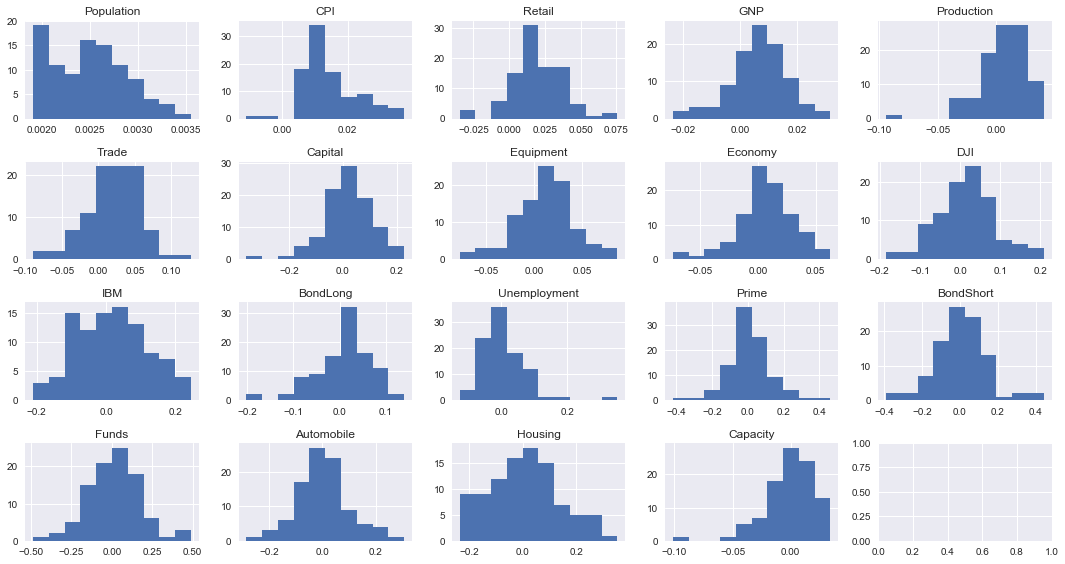

In [18]:
# histogram of transformed variables

fig, axs = plt.subplots(4, 5, figsize=(15,8))

for idx, ax in enumerate(axs.ravel()):
    if idx==19:
        pass
    else:
        ax.hist(df_diff[names[idx]].dropna(axis=0))
        ax.set_title(names[idx])
    
plt.tight_layout()

In [19]:
df_full_dropyear = df_full.drop(['Year'], axis=1)
df_full_dropyear.head()

,Population,CPI,Retail,GNP,Production,Trade,Capital,Equipment,Economy,DJI,IBM,BondLong,Unemployment,Prime,BondShort,Funds,Automobile,Housing,Capacity
0,197.892,0.329,24.165,2241.8000,57.6,67.8,8.088,138.3,73.3,830.56,37.9262,4.40,3.9,5.96,4.72,4.94,8.469,1.067,88.7
1,198.363,0.331,24.221,2255.2000,57.2,71.2,8.342,139.8,72.9,868.66,44.9585,4.51,3.8,5.50,3.84,4.05,8.916,1.091,86.8
2,198.911,0.334,24.662,2287.7000,56.5,71.3,8.822,138.0,75.4,888.51,50.1298,4.86,3.8,5.50,4.20,3.79,8.760,1.364,84.8
3,199.498,0.337,24.976,2300.6001,58.0,72.2,9.201,142.5,76.9,907.54,57.8531,5.18,4.0,5.50,4.55,3.88,7.866,1.491,85.8
4,199.920,0.341,25.818,2327.3000,59.4,77.3,5.909,146.6,78.0,884.77,61.1022,5.18,3.7,6.00,4.99,4.60,9.482,1.380,86.8


In [20]:
# Normalize the raw dataset

df_nmlz = (df_full_dropyear - df_full_dropyear.mean()) / (df_full_dropyear.max() - df_full_dropyear.min())
df_nmlz.head()

,Population,CPI,Retail,GNP,Production,Trade,Capital,Equipment,Economy,DJI,IBM,BondLong,Unemployment,Prime,BondShort,Funds,Automobile,Housing,Capacity
0,-0.491376,-0.422333,-0.415777,-0.461963,-0.442089,-0.404327,-0.300657,-0.387047,-0.446261,-0.176183,-0.364632,-0.391730,-0.342128,-0.232582,-0.217529,-0.208869,-0.243221,-0.302828,0.405014
1,-0.482698,-0.420380,-0.415340,-0.455014,-0.449510,-0.396314,-0.292703,-0.381389,-0.451726,-0.159586,-0.309020,-0.380425,-0.356414,-0.262432,-0.293131,-0.265994,-0.154916,-0.288292,0.287730
2,-0.472600,-0.417451,-0.411895,-0.438158,-0.462497,-0.396079,-0.277671,-0.388179,-0.417573,-0.150939,-0.268124,-0.344453,-0.356414,-0.262432,-0.262203,-0.282682,-0.185734,-0.122937,0.164273
3,-0.461785,-0.414521,-0.409442,-0.431468,-0.434667,-0.393957,-0.265802,-0.371204,-0.397081,-0.142649,-0.207046,-0.311565,-0.327843,-0.262432,-0.232134,-0.276905,-0.362344,-0.046014,0.226002
4,-0.454009,-0.410615,-0.402866,-0.417621,-0.408693,-0.381938,-0.368896,-0.355738,-0.382054,-0.152568,-0.181352,-0.311565,-0.370700,-0.229986,-0.194333,-0.230692,-0.043102,-0.113246,0.287730


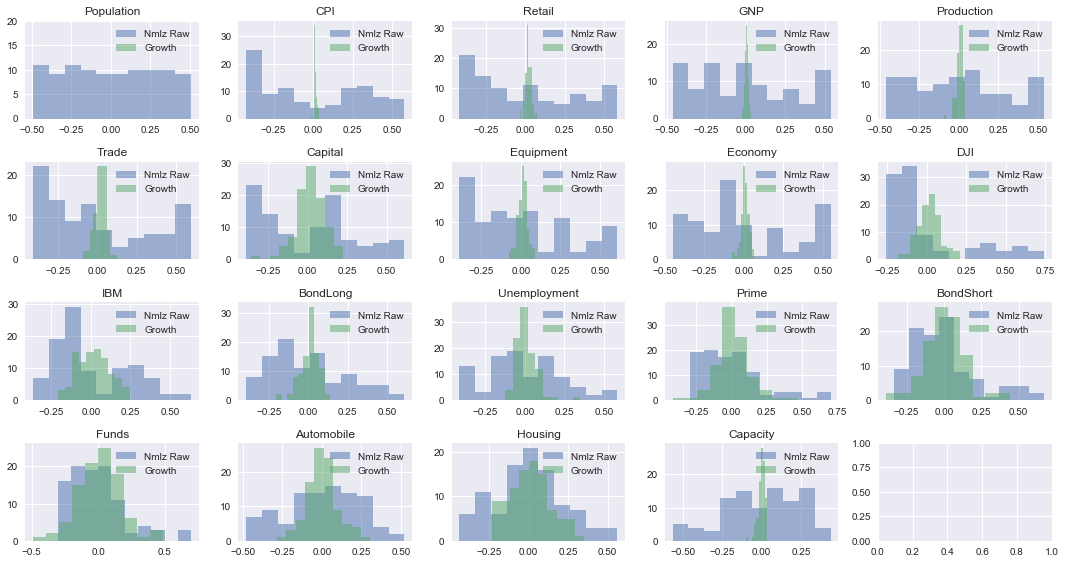

In [21]:
# histogram of transformed variables

fig_duo, axs_duo = plt.subplots(4, 5, figsize=(15,8))

for idx_duo, ax_duo in enumerate(axs_duo.ravel()):
    if idx_duo==19:
        pass
    else:
        ax_duo.hist(df_nmlz[names[idx_duo]].dropna(axis=0), alpha=0.5, label='Nmlz Raw')
        ax_duo.hist(df_diff[names[idx_duo]].dropna(axis=0), alpha=0.5, label='Growth')
        ax_duo.legend(loc='upper right')
        ax_duo.set_title(names[idx_duo])
    
plt.tight_layout()
plt.show()

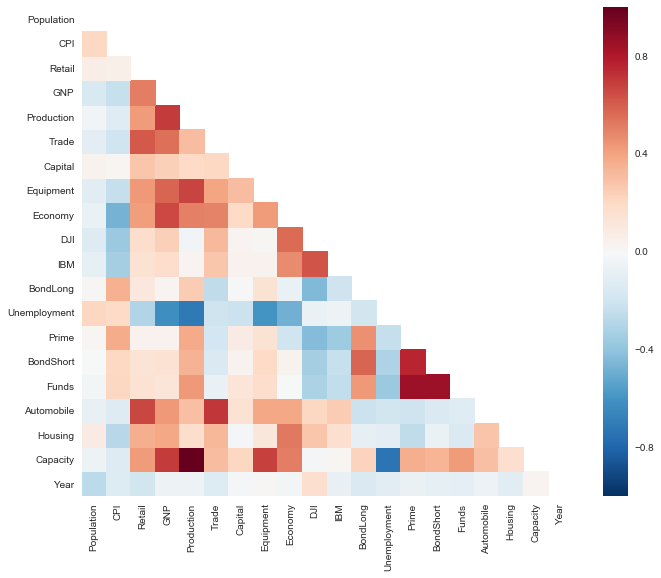

In [22]:
# Compute the correlation matrix

corr = df_diff.corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask_ur = np.zeros_like(corr, dtype=np.bool)
mask_ur[np.triu_indices_from(mask_ur)] = True

# Set up the figure
fig_corr, axs_corr = plt.subplots(figsize=(11,9))

# Draw the heatmap with mask
sns.heatmap(corr, mask=mask_ur)


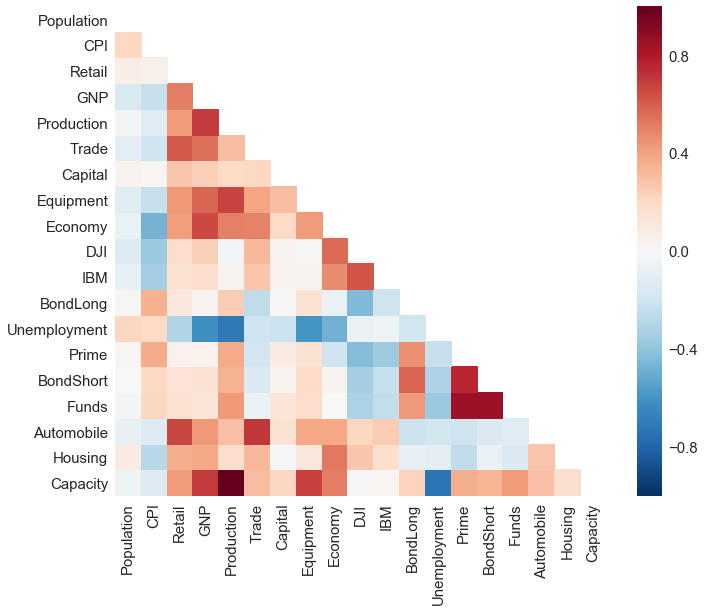

In [23]:
#### For Magnifying Font ####

# Compute the correlation matrix

df_diff_dropyear = df_diff.drop(['Year'], axis=1)

corr_dropyear = df_diff_dropyear.corr()
sns.set(style="white", font_scale=1.5)

# Generate a mask for the upper triangle
mask_ur_dropyear = np.zeros_like(corr_dropyear, dtype=np.bool)
mask_ur_dropyear[np.triu_indices_from(mask_ur_dropyear)] = True

# Set up the figure
fig_corr_dropyear, axs_corr_dropyear = plt.subplots(figsize=(11,9))

# Draw the heatmap with mask
sns.heatmap(corr_dropyear, mask=mask_ur_dropyear)


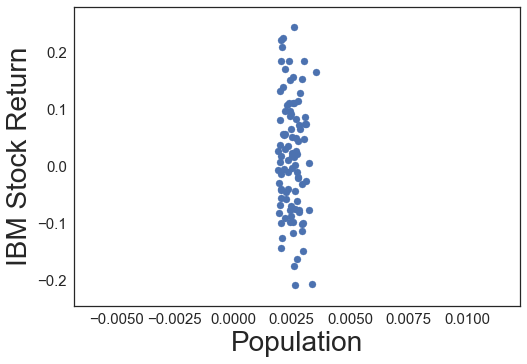

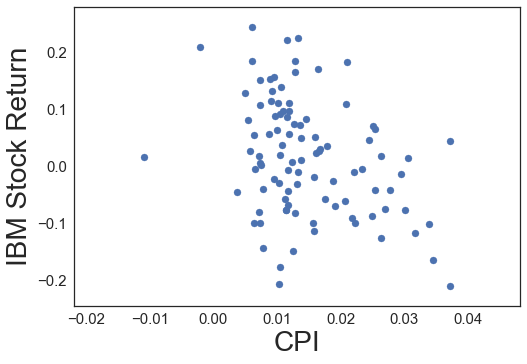

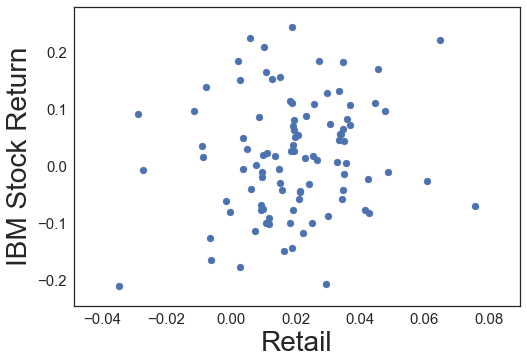

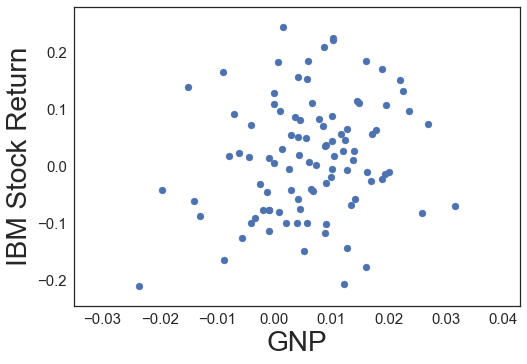

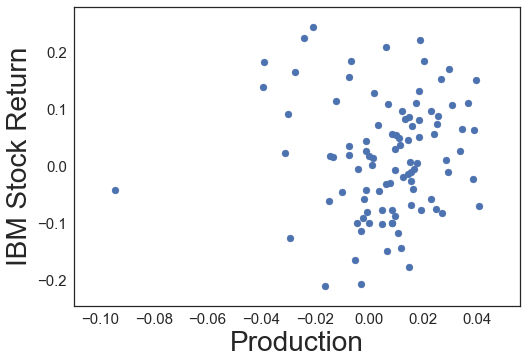

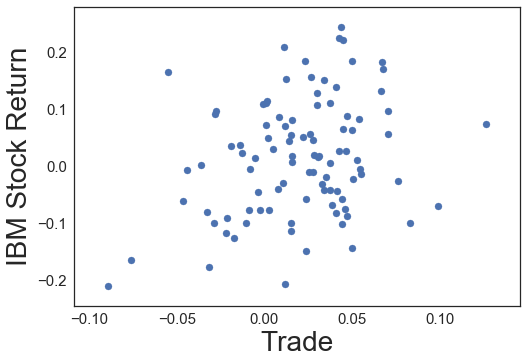

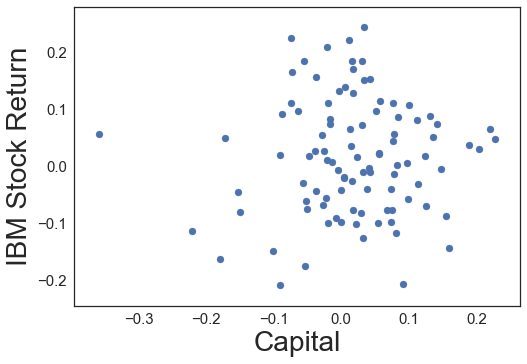

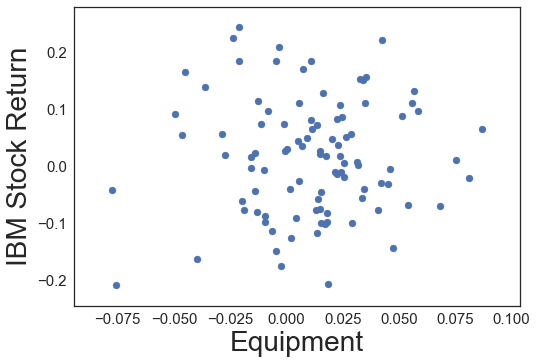

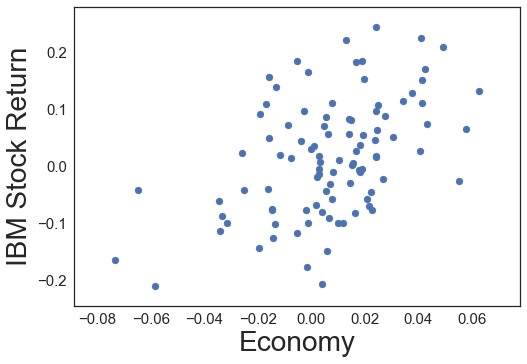

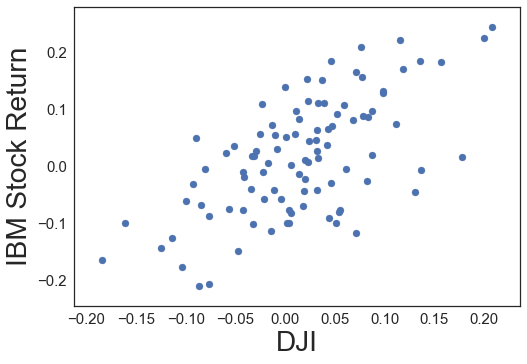

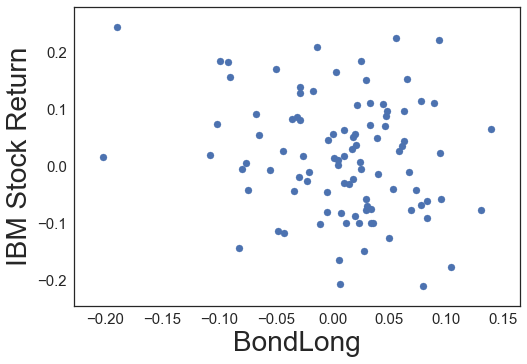

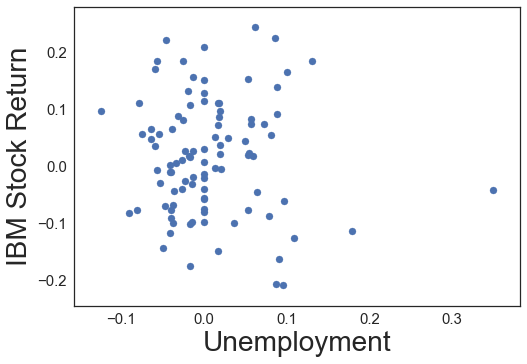

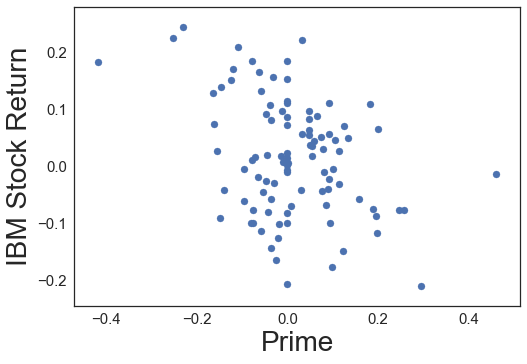

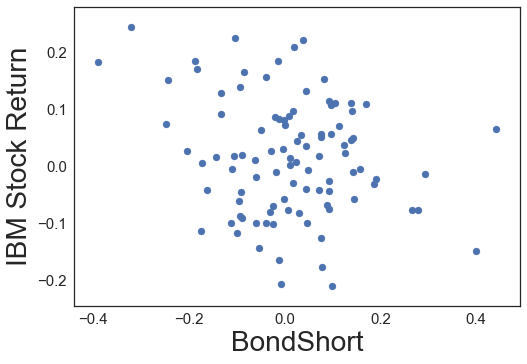

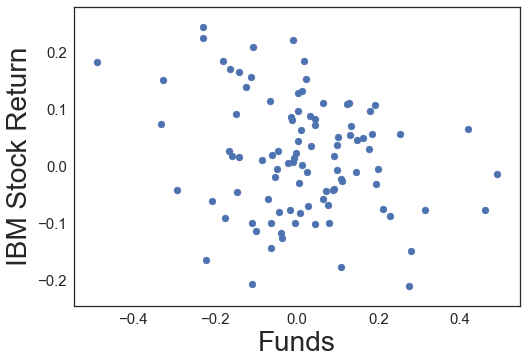

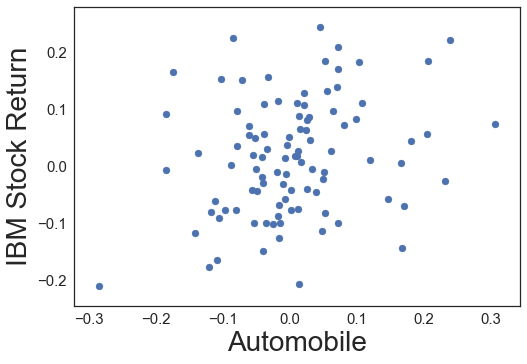

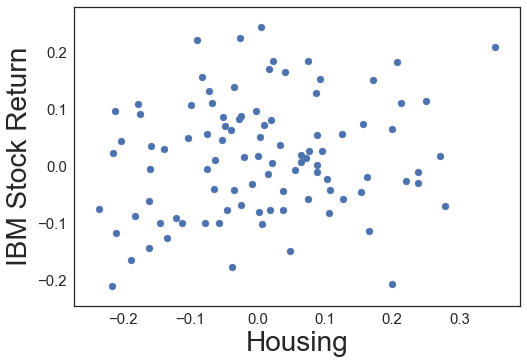

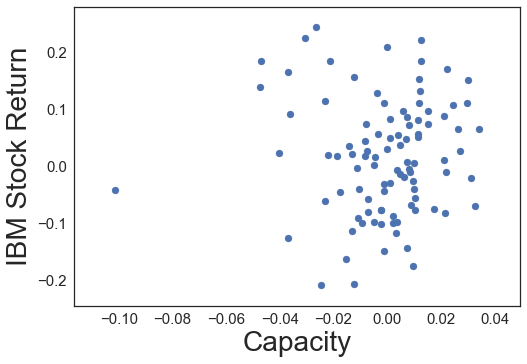

In [24]:
# Scatterplot of IBM vs others

for var in names:
    if var=='IBM':
        pass
    else:
        plt.scatter(df_diff[var].dropna(axis=0),df_diff['IBM'].dropna(axis=0))
        #plt.title("Scatterplot")
        plt.xlabel(var, fontsize=28)
        plt.ylabel("IBM Stock Return", fontsize=28)
        plt.show()

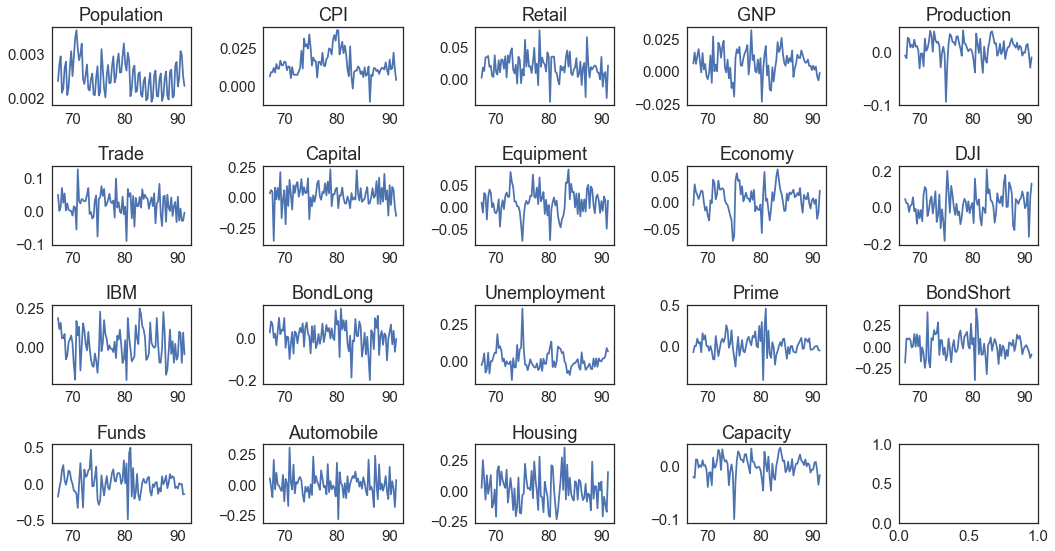

In [25]:
# Time Dependence of variables

fig_time, axs_time = plt.subplots(4, 5, figsize=(15,8))

for idx_time, ax_time in enumerate(axs_time.ravel()):
    if idx_time==19:
        pass
    else:
        ax_time.plot(df_diff['Year'],df_diff[names[idx_time]])
        ax_time.set_title(names[idx_time])
        
plt.tight_layout()

In [43]:
# Linear Regression on Growth Data

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [27]:
# Create a fitted model in one line on Growth Data

formula_full = 'IBM ~ \
                Population+\
                CPI+\
                Retail+\
                GNP+\
                Production+\
                Trade+\
                Capital+\
                Equipment+\
                Economy+\
                DJI+\
                BondLong+\
                Unemployment+\
                Prime+\
                BondShort+\
                Funds+\
                Automobile+\
                Housing+\
                Capacity'

lm = smf.ols(formula=formula_full, data=df_diff).fit()

# Print the coefficients
lm.params

Intercept       -0.042803
Population      -3.442154
CPI             -1.511207
Retail          -0.214373
GNP             -0.774219
Production      11.112778
Trade            0.040945
Capital          0.071575
Equipment       -0.405070
Economy          0.894301
DJI              0.744107
BondLong         0.193674
Unemployment     0.054250
Prime           -0.128285
BondShort        0.061904
Funds           -0.035047
Automobile       0.161451
Housing         -0.143916
Capacity       -10.672590
dtype: float64

In [28]:
# Print the summary of the fitted model on Growth Data

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IBM   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     4.771
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           5.77e-07
Time:                        23:54:03   Log-Likelihood:                 120.36
No. Observations:                  97   AIC:                            -202.7
Df Residuals:                      78   BIC:                            -153.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0428      0.064     -0.669      0.506      -0.170       0.085
Population      -3.4422     24.173     -0.142      0.887     -51.568      44.683
CPI             -1.5112      1.317     -1.147      0.255      -4.134       1.111
Retail          -0.2144      0.772     -0.278      0.782      -1.751       1.323
GNP             -0.7742      1.544     -0.502      0.617      -3.847       2.299
Production      11.1128      4.284      2.594      0.011       2.584      19.642
Trade            0.0409      0.392      0.104      0.917      -0.740       0.821
Capital          0.0716      0.099      0.724      0.471      -0.125       0.268
Equipment       -0.4051      0.433     -0.936      0.352      -1.267       0.456
Economy          0.8943      0.712      1.256      0.213      -0.524       2.312
DJI              0.7441      0.173      4.314      0.000       0.401       1.088
BondLong         0.1937      0.207      0.934      0.353      -0.219       0.607
Unemployment     0.0542      0.208      0.260      0.795      -0.360       0.469
Prime           -0.1283      0.156     -0.824      0.413      -0.438       0.182
BondShort        0.0619      0.149      0.415      0.680      -0.235       0.359
Funds           -0.0350      0.144     -0.244      0.808      -0.322       0.251
Automobile       0.1615      0.141      1.142      0.257      -0.120       0.443
Housing         -0.1439      0.082     -1.766      0.081      -0.306       0.018
Capacity       -10.6726      4.204     -2.539      0.013     -19.041      -2.304
==============================================================================
Omnibus:                        3.577   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                3.449
Skew:                          -0.458   Prob(JB):                        0.178
Kurtosis:                       2.887   Cond. No.                     3.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Create a fitted model on Raw Data

lm_raw = smf.ols(formula=formula_full, data=df_full).fit()

# Print the coefficients
lm_raw.params

Intercept       825.004463
Population       -3.202389
CPI             314.212990
Retail           -1.588735
GNP              -0.082000
Production        2.029080
Trade             0.097333
Capital          -1.240519
Equipment         0.043992
Economy           2.619451
DJI              -0.015198
BondLong         -1.586240
Unemployment     -6.259214
Prime            -0.597195
BondShort        -1.684662
Funds             1.905852
Automobile        6.148877
Housing           1.257133
Capacity         -3.946311
dtype: float64

In [30]:
# Print the summary of the fitted model on Raw Data

lm_raw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IBM   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     50.35
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           9.20e-36
Time:                        23:54:03   Log-Likelihood:                -349.43
No. Observations:                  98   AIC:                             736.9
Df Residuals:                      79   BIC:                             786.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      825.0045    739.157      1.116      0.268    -646.250    2296.259
Population      -3.2024      4.004     -0.800      0.426     -11.172       4.767
CPI            314.2130    117.839      2.666      0.009      79.661     548.765
Retail          -1.5887      1.245     -1.276      0.206      -4.067       0.890
GNP             -0.0820      0.057     -1.427      0.157      -0.196       0.032
Production       2.0291      3.102      0.654      0.515      -4.145       8.203
Trade            0.0973      0.154      0.631      0.530      -0.209       0.404
Capital         -1.2405      0.778     -1.594      0.115      -2.790       0.308
Equipment        0.0440      0.213      0.206      0.837      -0.381       0.469
Economy          2.6195      0.642      4.079      0.000       1.341       3.898
DJI             -0.0152      0.010     -1.489      0.141      -0.036       0.005
BondLong        -1.5862      2.468     -0.643      0.522      -6.498       3.326
Unemployment    -6.2592      3.929     -1.593      0.115     -14.079       1.561
Prime           -0.5972      2.380     -0.251      0.802      -5.334       4.139
BondShort       -1.6847      2.592     -0.650      0.518      -6.843       3.474
Funds            1.9059      2.258      0.844      0.401      -2.589       6.401
Automobile       6.1489      1.884      3.264      0.002       2.399       9.898
Housing          1.2571      5.301      0.237      0.813      -9.293      11.808
Capacity        -3.9463      2.274     -1.735      0.087      -8.473       0.580
==============================================================================
Omnibus:                        4.214   Durbin-Watson:                   1.138
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.651
Skew:                           0.346   Prob(JB):                        0.161
Kurtosis:                       3.644   Cond. No.                     2.69e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
lm_raw.outlier_test()

,student_resid,unadj_p,bonf(p)
0,-0.426337,0.671036,1.000000
1,-0.307707,0.759126,1.000000
2,-0.355762,0.722979,1.000000
3,1.465773,0.146730,1.000000
4,0.009867,0.992153,1.000000
5,0.586799,0.559033,1.000000
6,0.468771,0.640541,1.000000
7,-0.807621,0.421765,1.000000
8,-1.082878,0.282199,1.000000
9,-0.758120,0.450664,1.000000


In [56]:
# Get the Cook's Distance

(cookdis, cookpval) = lm_raw.get_influence().cooks_distance

<Container object of 3 artists>

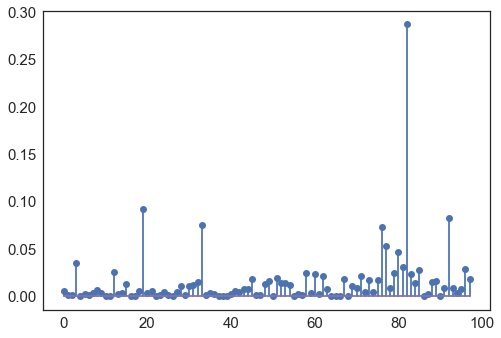

In [58]:
# Get the outliers - Cook's Distance

plt.stem(np.arange(len(cookdis)), cookdis)

In [ ]:
# Create a fitted model on Raw Data

lm_nmlz = smf.ols(formula=formula_full, data=df_nmlz).fit()

# Print the coefficients
lm_nmlz.summary()

In [ ]:
# Log transform and 1st difference

df_log_diff = np.log((df_nmlz / df_nmlz.shift(1)))
df_log_diff.head()

In [ ]:
# histogram of log-transformed variables

fig_log_diff, axs_log_diff = plt.subplots(4, 5, figsize=(15,8))

for idx_log_diff, ax_log_diff in enumerate(axs_log_diff.ravel()):
    if idx_log_diff==19:
        pass
    else:
        ax_log_diff.hist(df_log_diff[names[idx_log_diff]].dropna(axis=0))
        ax_log_diff.set_title(names[idx_log_diff])
    
plt.tight_layout()

In [ ]:
# Create a fitted model on Log-transformed and 1st-level-differenced Data

lm_log_diff = smf.ols(formula=formula_full, data=df_log_diff).fit()

# Print the coefficients
lm_log_diff.summary()

In [ ]:
# Log transform only

df_log = np.log(df_full)
df_log.head()

In [ ]:
# histogram of log-transformed variables

fig_log, axs_log = plt.subplots(4, 5, figsize=(15,8))

for idx_log, ax_log in enumerate(axs_log.ravel()):
    if idx_log==19:
        pass
    else:
        ax_log.hist(df_log[names[idx_log]].dropna(axis=0))
        ax_log.set_title(names[idx_log])
    
plt.tight_layout()

In [ ]:
# Create a fitted model on Log-transformed Raw Data

lm_log = smf.ols(formula=formula_full, data=df_log).fit()

# Print the coefficients
lm_log.summary()

In [ ]:
# Scatterplot of IBM vs others - Log-transformed Raw Data

for var in names:
    if var=='IBM':
        pass
    else:
        plt.scatter(df_log[var].dropna(axis=0),df_log['IBM'].dropna(axis=0))
        #plt.title("Scatterplot")
        plt.xlabel(var, fontsize=28)
        plt.ylabel("IBM Stock Return", fontsize=28)
        plt.show()